## Online Shopper intension Analysis using Python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
!pip3 install opendatasets --upgrade --quiet

In [4]:
import opendatasets as od

In [5]:
od.download('https://www.kaggle.com/datasets/henrysue/online-shoppers-intention')

Skipping, found downloaded files in "./online-shoppers-intention" (use force=True to force download)


In [6]:
data=pd.read_csv('/content/online-shoppers-intention/online_shoppers_intention.csv')

In [7]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
data.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [9]:
data.fillna(0,inplace=True)

In [10]:
x=data.iloc[:,5:7].values
x.shape

(12330, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.p

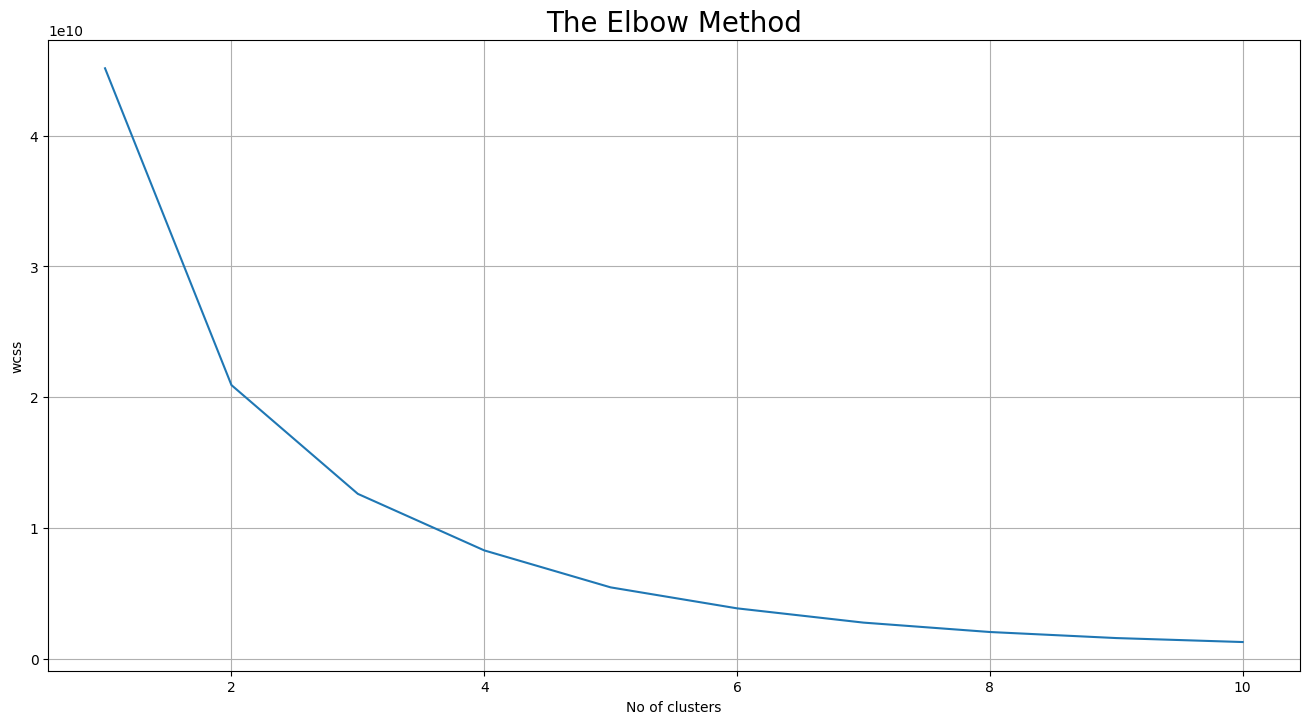

In [11]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
  km=KMeans(n_clusters=i,
            init='k-means++',
            max_iter=300,
            n_init=10,
            random_state=0,
            algorithm='full',
            tol=0.001)
  km.fit(x)
  labels=km.labels_
  wcss.append(km.inertia_)

plt.rcParams['figure.figsize']=(13,7)
plt.plot(range(1,11),wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

## kmeans clustering

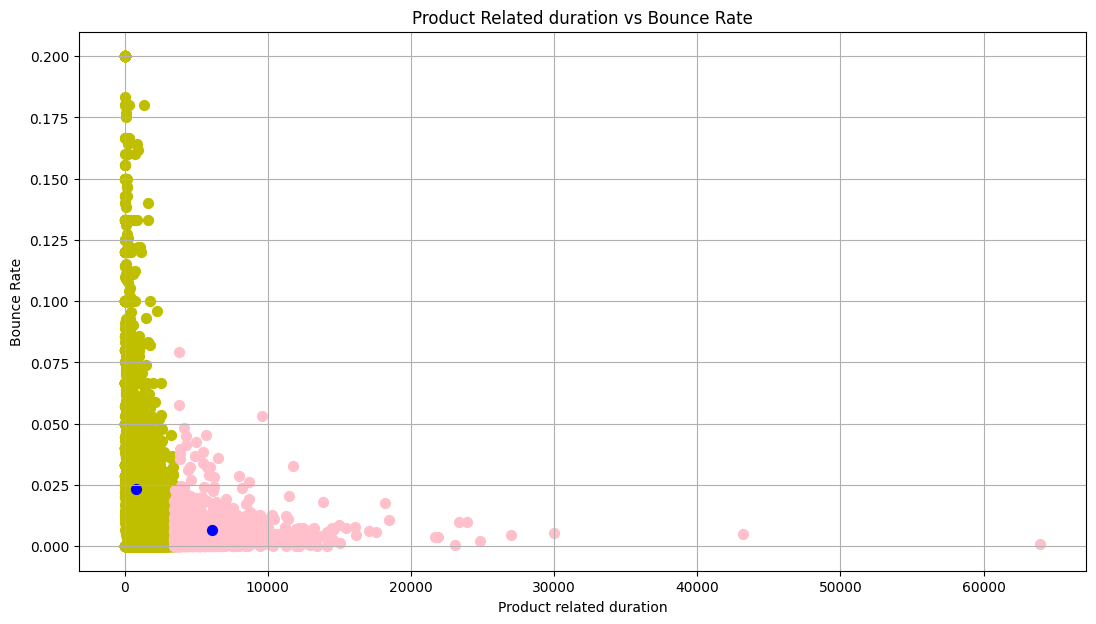

In [12]:
km=KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0)

y_means=km.fit_predict(x)

plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c='y',label='unintrested customers')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c='pink',label='Target customers')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='blue',label='centroid')
plt.title('Product Related duration vs Bounce Rate')
plt.grid()
plt.xlabel('Product related duration')
plt.ylabel('Bounce Rate')
plt.show()

In [13]:
!pip3 install scikit-plot --upgrade --quiet
!pip install scipy==1.8.1 --upgrade --quiet

Adjusted rand index
0.08359442469281096


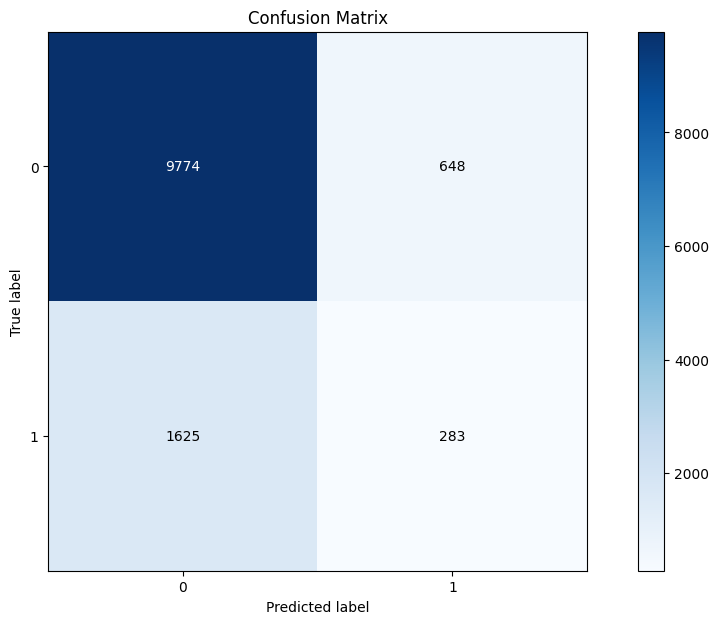

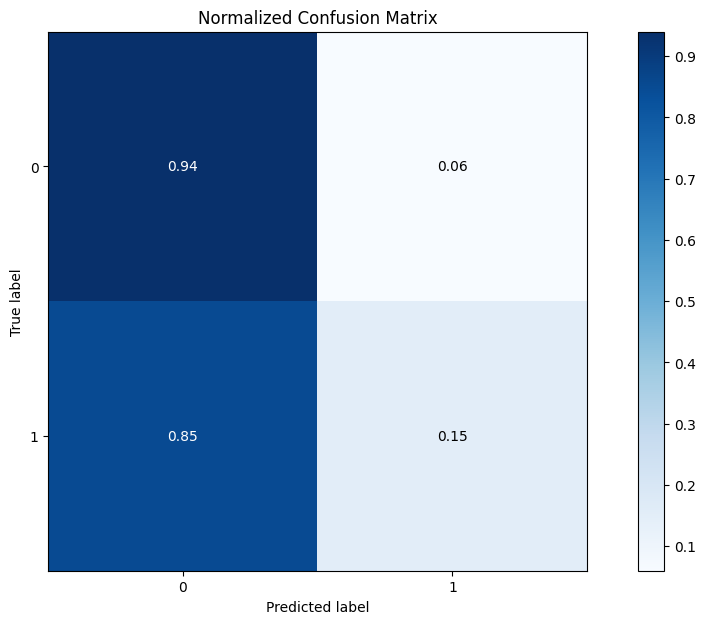

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lable_true=le.fit_transform(data['Revenue'])

label_pred=y_means

from sklearn.metrics import adjusted_rand_score
score=adjusted_rand_score(lable_true,label_pred)
print('Adjusted rand index')
print(score)

import scikitplot as skplt
plt_1=skplt.metrics.plot_confusion_matrix(lable_true,label_pred,normalize=False)
plt_2=skplt.metrics.plot_confusion_matrix(lable_true,label_pred,normalize=True)